# Chapter 5: Introduction to Confidence Intervals: The Bootstrap

<https://sites.google.com/site/chiharahesterberg/chapter-materials-Ed2>

<https://www.youtube.com/playlist?list=PLNyILlFU1DRfKsEkd5kRR3xb2si2HIwZX>

## Intro to Bootstrap Distributions

We have seen how to construct a sampling distribution in several situations:

- If we know the population mean and standard deviation, we can use CLT.

- When we are performing a hypothesis test, we simulate the sampling distribution

**In many situations, we only have one sample, and no claim about about the population. How can we construct a sampling distribution in such scenarios?**

### Example

The dataset `NCBirths2004` from the textbook contains data from a random sample of 1009 babies born in North Carolina in 2004 and contains variables:

- `Age`: monther's age

- `Tobacco`: mother used tobacco?

- `Gender`: gender assigned at birth to baby

- `Weight`

- `Gestation`: gestation period in weeks when born

Open R and using this dataset, give a good estimate for the mean weight (in grams) of all babies born in North Carolina in 2004. **How sure are you with your estimate?**

In [4]:
library(resampledata) # for data
library(tidyverse)

In [5]:
head(NCBirths2004)

ID,MothersAge,Tobacco,Alcohol,Gender,Weight,Gestation,Smoker
1,30-34,No,No,Male,3827,40,No
2,30-34,No,No,Male,3629,38,No
3,35-39,No,No,Female,3062,37,No
4,20-24,No,No,Female,3430,39,No
5,25-29,No,No,Male,3827,38,No
6,35-39,No,No,Female,3119,39,No


In [8]:
glimpse(NCBirths2004)

Observations: 1,009
Variables: 8
$ ID         <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 1...
$ MothersAge <fct> 30-34, 30-34, 35-39, 20-24, 25-29, 35-39, 20-24, 20-24, ...
$ Tobacco    <fct> No, No, No, No, No, No, No, No, No, No, No, Yes, No, No,...
$ Alcohol    <fct> No, No, No, No, No, No, No, No, No, No, No, No, No, No, ...
$ Gender     <fct> Male, Male, Female, Female, Male, Female, Female, Male, ...
$ Weight     <int> 3827, 3629, 3062, 3430, 3827, 3119, 3260, 3969, 3175, 30...
$ Gestation  <int> 40, 38, 37, 39, 38, 39, 40, 40, 39, 39, 41, 39, 38, 39, ...
$ Smoker     <fct> No, No, No, No, No, No, No, No, No, No, No, Yes, No, No,...


In [7]:
# Mean weight in grams
mean(NCBirths2004$Weight)

[1] 3448.26

## Bootstrap Distributions

Given an original sample of size n from a population:

- Draw a resample of size n with replacement from the original sample. Compute the relevant statistic.

- Repeat this many times (say 10,000 times)

- Construct the **bootstrap distribution** of the statistic

### Example

*Consider the a random sample of 4 baby weights: 3800, 3065, 2950, and 4100.
Which of the following could be a possible bootrstrap resample? Explain why or why not.*

1. 3800, 3065, 4100

2. 3800, 3800, 3800, 3800,

3. 3800, 3065, 2950, 4100

4. 3800, 3065, 2950, 4100, 4100

5. 3800, 3065, 2950, 3450


**Answer:** We can easily elminiate choices 3 and 4 (sample size should be 4). Choice 5 includes an impossible value i.e. 3450. So, correct choices are **2 and 3**.

*How many possible bootstrap resamples can be constructed from an original sample that has n values?*

**Answer**: $n^n$

## Constructing Bootstrap Distribution

Below is the R code and corresponding output used to create a bootstrap distribution for the sample mean from the North Carolina births dataset:

**Task:**

Instead of going for $1009^{1009}$ resamples, we will take 10,000 resamples.

1. For each bootstrap resample, pick 1009 random numbers with replacement

2. Compute mean

3. Store it in `result`

In [25]:
N <- 10^5 # number of bootstrap resamples:100,000
result <- numeric(N) # vector where to store sample stats e.g. mean
weight <- resampledata::NCBirths2004$Weight
for (i in 1:N){
    x <- sample(weight, size = 1009, replace = TRUE)
    result[i] <- mean(x)
}

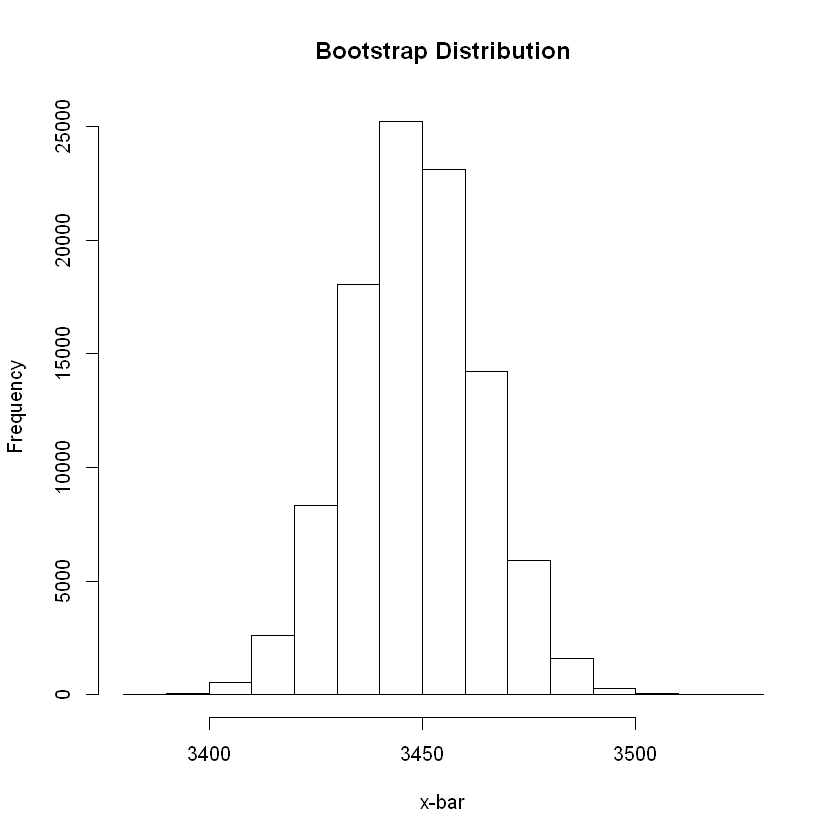

In [23]:
# Create a histogram of resulting bootstrap sample means
hist(result, xlab = "x-bar", main = "Bootstrap Distribution")

In [27]:
# Calculate center of the bootstrap distribution
mean(result)

[1] 3448.177

In [28]:
# Calculate standard error of the bootstrap distribution
sd(result)

[1] 15.30681